<a href="https://colab.research.google.com/github/adeepe/capstone/blob/main/model/Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
from dataclasses import dataclass
from absl import logging
logging.set_verbosity(logging.ERROR)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
 Capstone  'Colab Notebooks'   customTF1   customTF2  'My Drive'   VGG16


In [ ]:
import os

# Folder path containing the CSV files
folder_path = '/content/gdrive/MyDrive/Capstone/DatasetCSV'

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Iterate over each CSV file
for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)

    with open(file_path, 'r') as csvfile:
        # Membaca baris hingga baris ke-10 (end header)
        for _ in range(9):
            next(csvfile)

        # Membaca dan mencetak header aktual
        header = next(csvfile)
        print(f"Header looks like this for {file_name}:\n\n{header}")

        # Membaca dan mencetak dua data pertama
        print(f"First data point looks like this for {file_name}:\n\n{next(csvfile)}")
        print(f"Second data point looks like this for {file_name}:\n\n{next(csvfile)}")


Header looks like this for GUNUNGKIDUL1.csv:

YEAR,MO,DY,CLRSKY_SFC_SW_DWN

First data point looks like this for GUNUNGKIDUL1.csv:

1984,1,1,7.75

Second data point looks like this for GUNUNGKIDUL1.csv:

1984,1,2,7.55

Header looks like this for GUNUNGKIDUL2.csv:

YEAR,MO,DY,CLRSKY_SFC_SW_DWN

First data point looks like this for GUNUNGKIDUL2.csv:

1984,1,1,7.75

Second data point looks like this for GUNUNGKIDUL2.csv:

1984,1,2,7.55

Header looks like this for GUNUNGKIDUL3.csv:

YEAR,MO,DY,CLRSKY_SFC_SW_DWN

First data point looks like this for GUNUNGKIDUL3.csv:

1984,1,1,7.75

Second data point looks like this for GUNUNGKIDUL3.csv:

1984,1,2,7.55

Header looks like this for GUNUNGKIDUL4.csv:

YEAR,MO,DY,CLRSKY_SFC_SW_DWN

First data point looks like this for GUNUNGKIDUL4.csv:

1984,1,1,7.75

Second data point looks like this for GUNUNGKIDUL4.csv:

1984,1,2,7.32

Header looks like this for GUNUNGKIDUL5.csv:

YEAR,MO,DY,CLRSKY_SFC_SW_DWN

First data point looks like this for GUNUNGKIDUL

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [ ]:
import os

def parse_data_from_folder(folder_path):
    # Get a list of all CSV files in the folder
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

    # Initialize an empty list to store shortwave downward values for each file
    shdward_values_list = []

    # Initialize times list
    times = []

    # Iterate over each CSV file
    for file_name in csv_files:
        file_path = os.path.join(folder_path, file_name)

        # Read data from the file
        data = pd.read_csv(file_path, sep=',', skiprows=9)

        # Extract 'SHORTWAVE_DOWNWARD' values
        shdward_values = data['CLRSKY_SFC_SW_DWN'].tolist()

        # Append the extracted values to the list
        shdward_values_list.append(shdward_values)

        # If times list is empty, generate times for one instance (assuming all files have the same times)
        if not times:
            times = list(range(1, len(shdward_values) + 1))

    # Calculate the average shortwave downward for each time point across all files
    average_shdward = [sum(values) / len(values) for values in zip(*shdward_values_list)]

    return times, shdward_values_list, average_shdward

# Example usage
folder_path = '/content/gdrive/MyDrive/Capstone/DatasetCSV'
times, shdward_values_list, average_shdward = parse_data_from_folder(folder_path)

# Display results for all files
for i, shdward_values in enumerate(shdward_values_list):
    print(f"\nFile {i + 1} - Times: {times}")
    print(f"File {i + 1} - Shortwave Downward Values: {shdward_values}")

# Display average shortwave downward
print("\nAverage Shortwave Downward:", average_shdward)
print(f"Total {len(average_shdward)} values")


File 1 - Times: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 

In [ ]:
from datetime import datetime, timedelta

# Tanggal awal yang diinginkan
tanggal_awal = datetime(1984, 1, 1)

# Mengonversi array waktu ke format tanggal
times_date = [tanggal_awal + timedelta(days=waktu - 1) for waktu in times]

print(times_date[-5:])

[datetime.datetime(2023, 6, 26, 0, 0), datetime.datetime(2023, 6, 27, 0, 0), datetime.datetime(2023, 6, 28, 0, 0), datetime.datetime(2023, 6, 29, 0, 0), datetime.datetime(2023, 6, 30, 0, 0)]


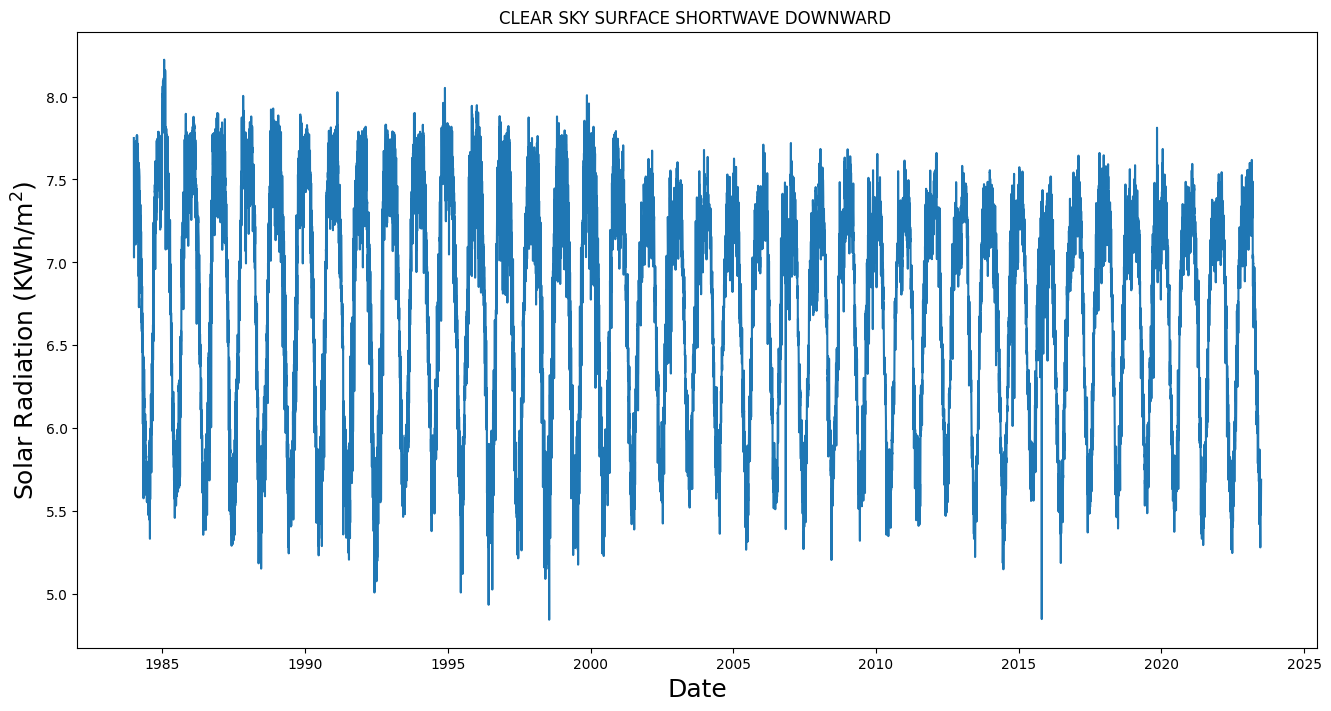

In [ ]:
plt.figure(figsize=(16,8))
plt.title('CLEAR SKY SURFACE SHORTWAVE DOWNWARD ')
plt.plot(times_date,average_shdward)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Solar Radiation (KWh/m$^2$)', fontsize=18)
plt. show()

In [ ]:
import math
#create a new dataframe with only the shdward_values
#data = df.filter(shdward_values)
#convert the dataframe to a numpy array
#dataset = shdward_values.values
#get the number of rows to trian the model on
training_data_len = math.ceil( len(average_shdward)* .8)

training_data_len

11541

In [ ]:
len(average_shdward)

14426

In [ ]:
from sklearn.preprocessing import MinMaxScaler

average_shdward = np.array(average_shdward)

# Reshape the array to 2D
average_shdward_2d = average_shdward.reshape(-1, 1)

# Create and use MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(average_shdward_2d)

# Output the scaled data
scaled_data

array([[0.86018957],
       [0.77369668],
       [0.64691943],
       ...,
       [0.21504739],
       [0.23518957],
       [0.25      ]])

In [ ]:
#create the trainign data set
#create the scaled trainign data set
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train dat sets
x_train = []
y_train = []

for i in range(7300, len(train_data)):
  x_train.append(train_data[i-7300:i, 0])
  y_train.append(train_data[i, 0])
  if i<=7301:
    print(x_train)
    print(y_train)
    print()

[array([0.86018957, 0.77369668, 0.64691943, ..., 0.81398104, 0.75236967,
       0.75296209])]
[0.7873222748815172]

[array([0.86018957, 0.77369668, 0.64691943, ..., 0.81398104, 0.75236967,
       0.75296209]), array([0.77369668, 0.64691943, 0.83945498, ..., 0.75236967, 0.75296209,
       0.78732227])]
[0.7873222748815172, 0.7488151658767781]



In [ ]:
#convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4241, 7300, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False, implementation=2))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

AttributeError: ignored

In [ ]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
4241/4241 [==============================] - 1324s 309ms/step - loss: 0.0034
Epoch 2/5
4241/4241 [==============================] - 1273s 300ms/step - loss: 0.0019
Epoch 3/5
4241/4241 [==============================] - 1273s 300ms/step - loss: 0.0018
Epoch 4/5
4241/4241 [==============================] - 1274s 300ms/step - loss: 0.0017
Epoch 5/5
4241/4241 [==============================] - 1269s 299ms/step - loss: 0.0016


In [ ]:
model_dir = '/content/gdrive/MyDrive/Capstone/model_stock2'

tf.saved_model.save(model, model_dir)

In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 11541 to 14426
test_data = scaled_data[training_data_len - 7300: , :]
#create the data sets x_test and y_test
x_test = []
y_test = average_shdward_2d[training_data_len:, :]
for i in range(7300, len(test_data)):
  x_test.append(test_data[i-7300:i, 0])


In [ ]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
x_test.shape

(2885, 7300, 1)

In [ ]:
model = tf.saved_model.load('/content/gdrive/MyDrive/Capstone/model_stock2')
print(model.signatures)
print(model.signatures["serving_default"].inputs)
print(model.signatures["serving_default"].outputs)

_SignatureMap({'serving_default': <ConcreteFunction (*, lstm_input: TensorSpec(shape=(None, 7300, 1), dtype=tf.float32, name='lstm_input')) -> Dict[['dense_1', TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_1')]] at 0x79C640CFD0C0>})
[<tf.Tensor 'lstm_input:0' shape=(None, 7300, 1) dtype=float32>, <tf.Tensor 'unknown:0' shape=() dtype=resource>, <tf.Tensor 'unknown_0:0' shape=() dtype=resource>, <tf.Tensor 'unknown_1:0' shape=() dtype=resource>, <tf.Tensor 'unknown_2:0' shape=() dtype=resource>, <tf.Tensor 'unknown_3:0' shape=() dtype=resource>, <tf.Tensor 'unknown_4:0' shape=() dtype=resource>, <tf.Tensor 'unknown_5:0' shape=() dtype=resource>, <tf.Tensor 'unknown_6:0' shape=() dtype=resource>, <tf.Tensor 'unknown_7:0' shape=() dtype=resource>, <tf.Tensor 'unknown_8:0' shape=() dtype=resource>]
[<tf.Tensor 'Identity:0' shape=(None, 1) dtype=float32>]


In [ ]:
predictions = model.signatures["serving_default"](lstm_input=x_test)['Identity']  # Sesuaikan dengan nama output layer model Anda

In [ ]:
#get the modles predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.06106739873902638

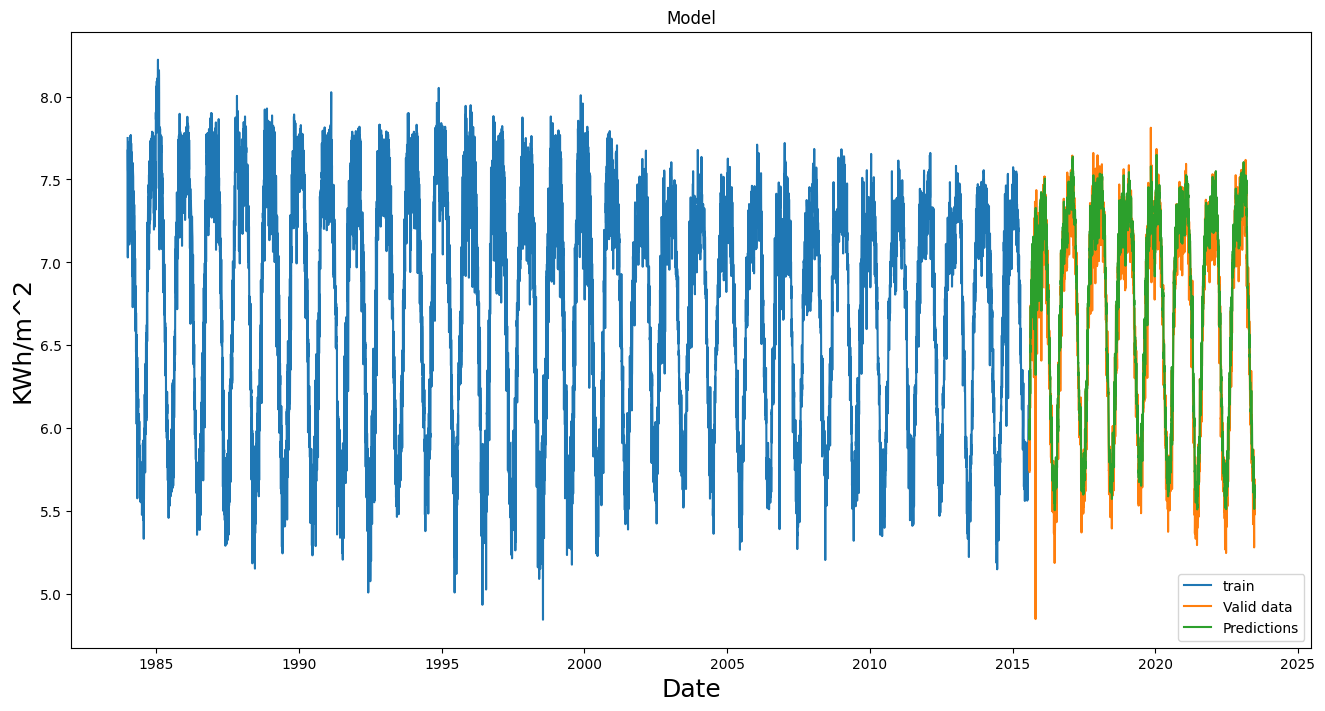

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# plot the data
train = average_shdward[:training_data_len]
valid = average_shdward[training_data_len:]

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('KWh/m^2', fontsize=18)

# Plot train data
plt.plot(times_date[:training_data_len], train, label='train')

# Plot valid data and predictions
plt.plot(times_date[training_data_len:], valid, label='Valid data')  # Valid data (KWh/m^2)
plt.plot(times_date[training_data_len:], predictions, label='Predictions')   # Predictions

plt.legend(loc='lower right')
plt.show()

In [ ]:
valid = np.column_stack((valid, predictions))
print(valid)

[[5.738      5.9665103 ]
 [5.93       5.93127489]
 [5.746      6.05642891]
 ...
 [5.572      5.58203173]
 [5.64       5.61769152]
 [5.69       5.65528297]]


In [ ]:
#Get the last 60 day closing price values and convert the dataframe to an array
last_365_days = average_shdward_2d[-1000:]
#Scale teh data to be alues between 0 and 1
last_365_days_scaled = scaler.transform(last_365_days)
#create an empty list
X_test = []
#append the past 60 days
X_test.append(last_365_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_shdward = model.predict(X_test)
#undo the scaling
pred_shdward = scaler.inverse_transform(pred_shdward)
print(pred_shdward)

1/1 [==============================] - 0s 39ms/step
[[5.7042093]]


In [ ]:
# Inisialisasi list untuk menyimpan hasil prediksi
num_steps_ahead = 365
predictions = []

# Loop untuk membuat prediksi sebanyak langkah ke depan yang diinginkan
for _ in range(num_steps_ahead):
    # Melakukan prediksi untuk 1 langkah ke depan
    pred = model.predict(X_test)

    # Menyimpan hasil prediksi
    predictions.append(pred)

    # Mengupdate X_test untuk langkah waktu berikutnya
    X_test = np.concatenate([X_test, pred.reshape(1, 1, 1)], axis=1)  # Tambahkan prediksi ke bagian akhir X_test

# Menggabungkan hasil prediksi menjadi satu array
predictions = np.concatenate(predictions, axis=1)

# Undo scaling jika diperlukan
predictions = scaler.inverse_transform(predictions)

# Menampilkan hasil prediksi
print(predictions)


1/1 [==============================] - 0s 66ms/step
[[5.7042093 5.722716  5.739894  5.7536187 5.7693286 5.7878933 5.809082
  5.831171  5.8540077 5.8770294 5.90032   5.9241123 5.94869   5.9742217
  6.0007896 6.0283823 6.0569444 6.086408  6.1167107 6.147785  6.179555
  6.2119207 6.2447624 6.2779427 6.311317  6.344745  6.378101  6.4112773
  6.444192  6.476789  6.5090404 6.540943  6.5725174 6.6038013 6.6348433
  6.665698  6.696417  6.7270417 6.7576003 6.7881007 6.818528  6.8488483
  6.8790007 6.908909  6.938482  6.9676228 6.996233  7.024221  7.0515084
  7.0780334 7.103752  7.1286407 7.152694  7.175923  7.1983514 7.2200146
  7.240955  7.2612176 7.2808523 7.299906  7.3184276 7.336461  7.35405
  7.371233  7.388046  7.404523  7.4206924 7.436583  7.452217  7.4676185
  7.4828043 7.4977922 7.5125976 7.527234  7.541711  7.5560384 7.570223
  7.584272  7.598188  7.6119747 7.6256323 7.639163  7.6525636 7.6658325
  7.678967  7.6919613 7.704812  7.7175145 7.730061  7.742446  7.754662
  7.766704  7.7785

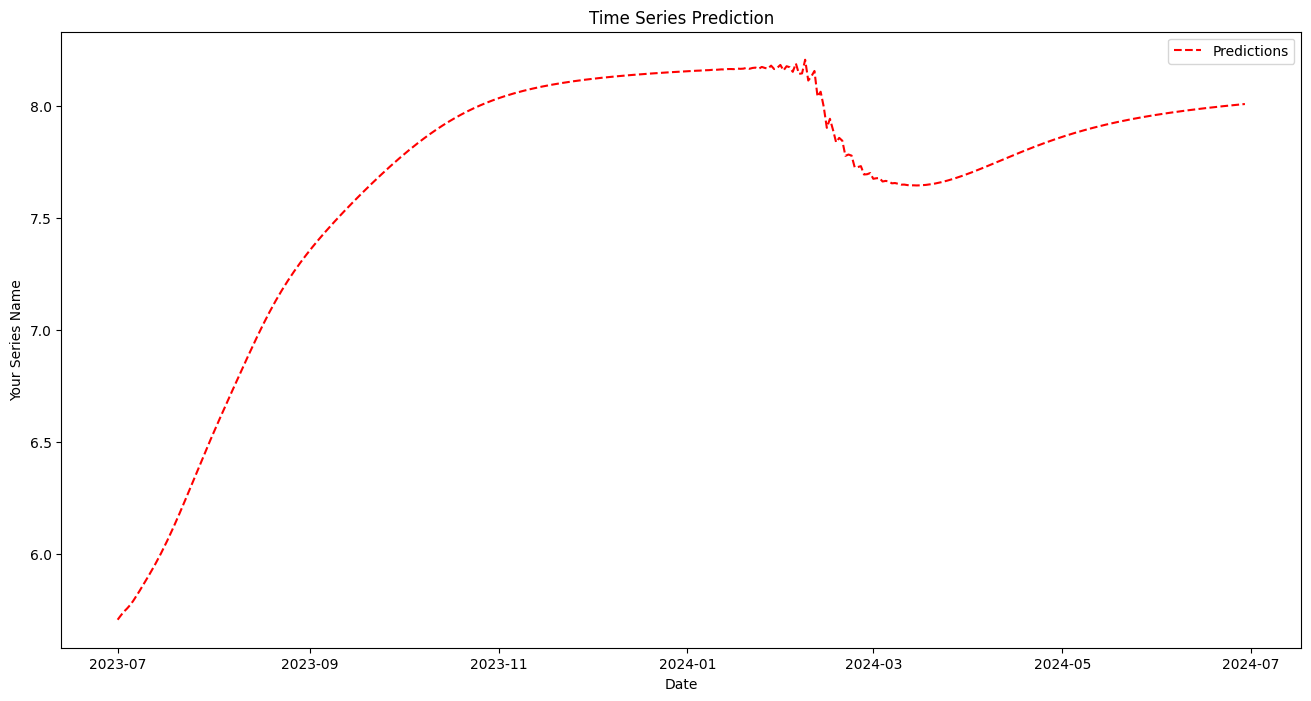

In [ ]:
# Mengambil tanggal terakhir dari data asli
last_date = times_date[-1]

# Membuat tanggal untuk langkah-langkah ke depan yang dihasilkan
date_range = pd.date_range(start=last_date, periods=num_steps_ahead+1, freq='D')[1:]  # dimulai dari hari setelah tanggal terakhir

# Membuat DataFrame untuk hasil prediksi
predictions_df = pd.DataFrame(predictions.reshape(-1, 1), columns=['Predictions'], index=date_range)

# Plotting
plt.figure(figsize=(16, 8))
plt.plot(date_range, predictions_df, label='Predictions', linestyle='dashed', color='red')
plt.title('Time Series Prediction')
plt.xlabel('Date')
plt.ylabel('Your Series Name')
plt.legend()
plt.show()